In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
import pandas as pd

df_county = pd.read_csv('../data/county_fips_master.csv', encoding='latin-1')[['fips', 'state_abbr', 'region_name']]
fips2state = dict(df_county[['fips', 'state_abbr']].values)
fips2region = dict(df_county[['fips', 'region_name']].values)

all_states = df_county.state_abbr.unique()
all_regions = np.array(['South', 'West', 'Northeast', 'Midwest'])

states_across_years = {}
regions_across_years = {}

for year in tqdm(range(2013, 2020)):
    df = pd.read_csv('../data/geotweets/geotweets-blm-' + str(year) + '.csv')
    df = df[df.fips != -2]
    df = df[df.notnull()]
    df = df[df.fips.notnull()]
    states = [fips2state[i] if i in list(fips2state.keys()) else 'UNK' for i in df.fips.values]
    regions = [fips2region[i] if i in list(fips2region.keys()) else 'UNK' for i in df.fips.values]
    state_stats = pd.DataFrame(pd.Series(states).value_counts()).reset_index().rename(columns = {'index': 'State', 0: '# of BLM Tweets'})
    region_stats = pd.DataFrame(pd.Series(regions).value_counts()).reset_index().rename(columns = {'index': 'Region', 0: '# of BLM Tweets'})
    
    year_state = dict(zip(state_stats['State'].values, state_stats['# of BLM Tweets'].values))
    
    year_region = dict(zip(region_stats['Region'].values, region_stats['# of BLM Tweets'].values))
    
    for i in np.setdiff1d(all_states, state_stats['State'].values):
        year_state[i] = 0
    
    for i in np.setdiff1d(all_regions, region_stats['Region'].values):
        year_region[i] = 0
    
    for i, j in year_state.items():
        if i not in states_across_years:
            states_across_years[i] = [j]
        else:
            states_across_years[i].append(j)
            
    for i, j in year_region.items():
        if i not in regions_across_years:
            regions_across_years[i] = [j]
        else:
            regions_across_years[i].append(j)

100%|██████████| 7/7 [00:58<00:00,  8.35s/it]


In [2]:
del states_across_years['UNK']
del regions_across_years['UNK']

df_states = pd.DataFrame(states_across_years)
df_regions = pd.DataFrame(regions_across_years)

In [3]:
df_states

,IL,TN,CA,IN,NY,TX,DC,PA,VA,NM,...,AK,DE,HI,MO,NE,OK,UT,VT,WA,WY
0,82,22,16,15,12,10,9,9,8,7,...,0,0,0,0,0,0,0,0,0,0
1,1677,351,2664,274,1967,1726,1466,1197,559,72,...,15,15,75,1484,67,121,67,85,141,12
2,1318,233,1435,124,751,871,464,637,302,60,...,20,12,50,635,18,68,53,37,88,3
3,3313,839,3796,721,2346,4132,1262,1761,1477,198,...,75,20,96,609,184,356,185,83,346,22
4,1810,213,2911,155,612,968,572,458,476,37,...,10,3,19,230,46,68,46,18,128,10
5,624,111,958,130,464,571,491,382,390,22,...,2,2,30,130,22,37,38,41,95,8
6,910,124,826,49,331,383,405,347,169,87,...,1,6,14,139,30,26,31,40,47,5


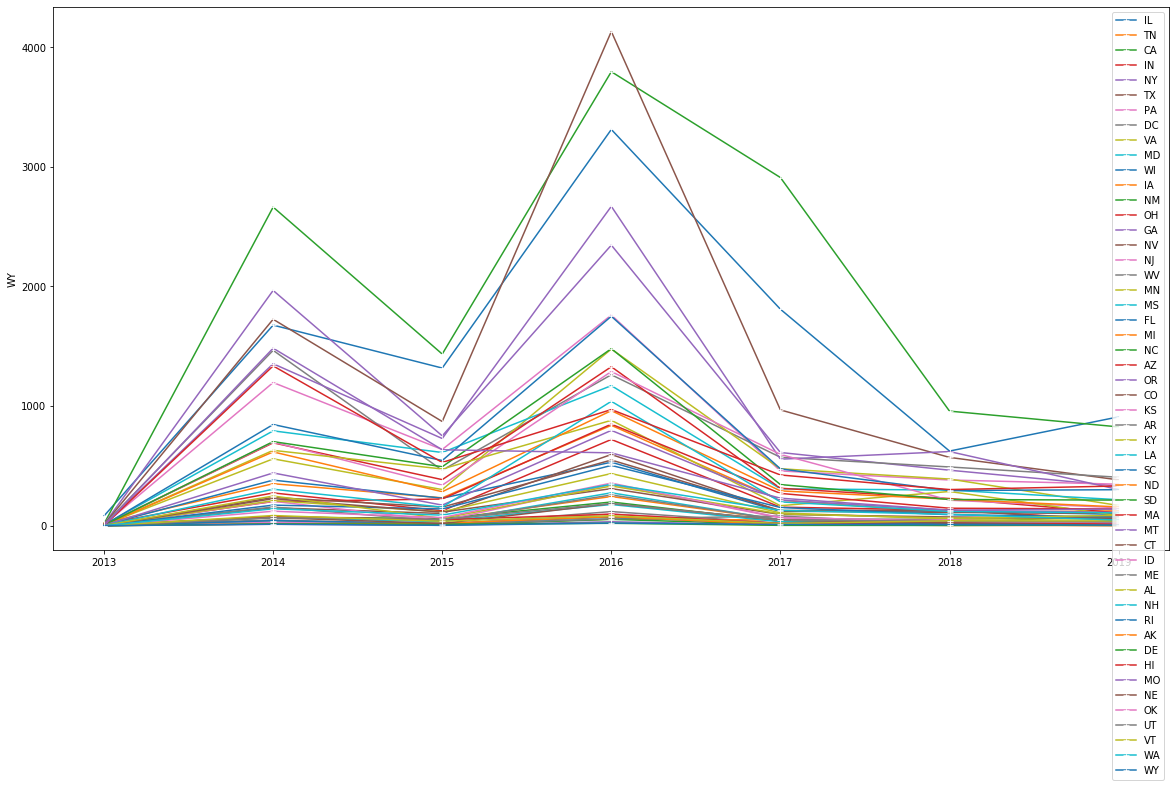

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

for i in df_states.columns.values:
    sns.lineplot(x=list(range(2013, 2020)), y=df_states[i], marker="+", label = i)
plt.legend()

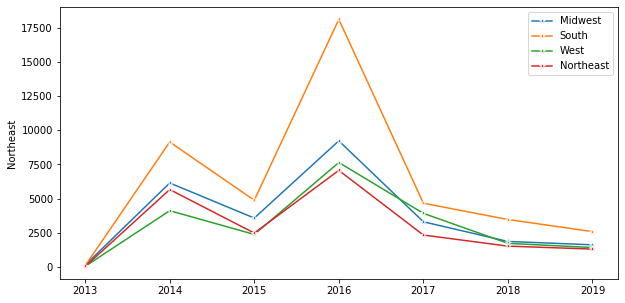

In [10]:
plt.figure(figsize=(10,5))

for i in df_regions.columns.values:
    sns.lineplot(x=list(range(2013, 2020)), y=df_regions[i], marker="*", label = i)
plt.legend()

In [4]:
state_shootings = pd.read_csv('../data/police-killings-state.csv')
state_shootings.head(2)

,State,State Abbreviation,Total Population,Black Population,Hispanic Population,Native American Population,Asian Population,Pacific Islander Population,White Population,Other Population,...,Rate (Hispanic People),Rate (Native American People),Rate (Asian People),Rate (Pacific Islanders),Rate (White People),Rate (All People),Disparity in Rate,Black-White Disparity,Hispanic-White Disparity,Native American-White Disparity
0,Alabama,AL,"4,864,680","1,285,737","203,146","23,243","63,936","1,521","3,196,730","90,367",...,0.00,0.00,2.23,0.0,3.31,4.05,1.45,1.78,0.00,0.0
1,Alaska,AK,"738,516","22,817","51,186","103,506","45,617","8,544","450,754","56,092",...,2.79,16.56,0.00,0.0,5.70,7.74,3.24,4.39,0.49,2.9


In [5]:
from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
racism_index = pd.read_csv('../data/racism_index.csv')

In [24]:
racism_index[racism_index.columns.values[-1]].iloc[13] = 0

0

In [26]:
racism_index[racism_index.columns.values[-1]] = racism_index[racism_index.columns.values[-1]].astype(float)

In [18]:
racism_index.columns.values[-1]

array(['state', 'state_abbr', 'racism_index',
       'Black shootings rate (per 1,000,000 person-years)',
       'White shootings rate (per 1,000,000 person-years)',
       'Black to White rate ratio',
       'Black unarmeda\xa0shooting rate (per 1,000,000 person-years)',
       'White unarmeda\xa0shootings rate (per 1,000,000 person-years)',
       'Black to White unarmeda\xa0shootings rate ratio'], dtype=object)

In [11]:
n_tweets = np.sum(df_states.values, axis = 0)

In [12]:
n_tweets_normalized = (n_tweets - np.mean(n_tweets))/np.std(n_tweets)

In [15]:
from scipy import stats
def plot(df, x_var, y_var, values):
    state2index = dict(df[[x_var, y_var]].values)
    values_normalized = (values - np.mean(values))/np.std(values)
    state2index_normalized = dict(zip(df[x_var].values, values_normalized))

    index = [state2index[i] if i in state2index else np.mean(values)
             for i in list(df_states.keys())]
    slope, intercept, r_value, p_value, std_err = stats.linregress(n_tweets, index)

    ax = sns.regplot(n_tweets, index,
     line_kws={'label':"y={0:.5f}x+{1:.3f}".format(slope,intercept)})
    ax.legend()
    plt.show()
    
    print('Normalization:')
    
    index_norm = [state2index_normalized[i] if i in state2index_normalized else np.mean(values_normalized)
         for i in list(df_states.keys())]

    slope, intercept, r_value, p_value, std_err = stats.linregress(n_tweets_normalized, index_norm)

    ax = sns.regplot(n_tweets, index,
     line_kws={'label':"y={0:.5f}x+{1:.3f}".format(slope,intercept)})

    ax.legend()
    plt.show()
    
    sns.jointplot(n_tweets_normalized, index_norm, kind='reg', height=8).annotate(stats.pearsonr)


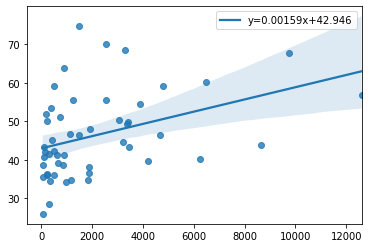

Normalization:


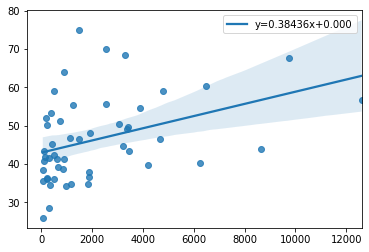

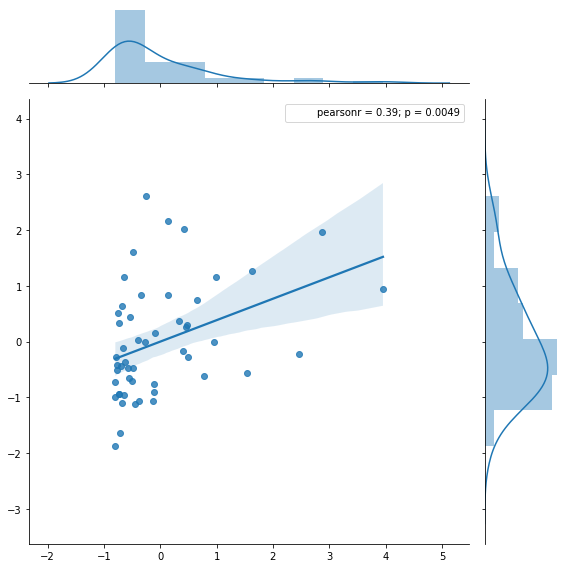

In [16]:
x_var = 'state_abbr'
y_var = 'racism_index'
values = racism_index.racism_index.values
df = racism_index

plot(df, x_var, y_var, values)

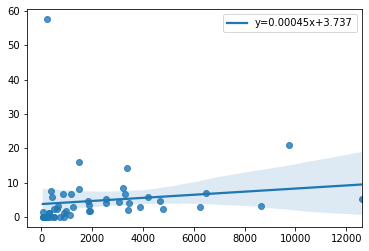

Normalization:


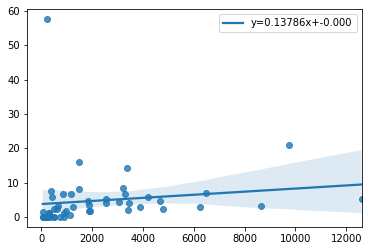

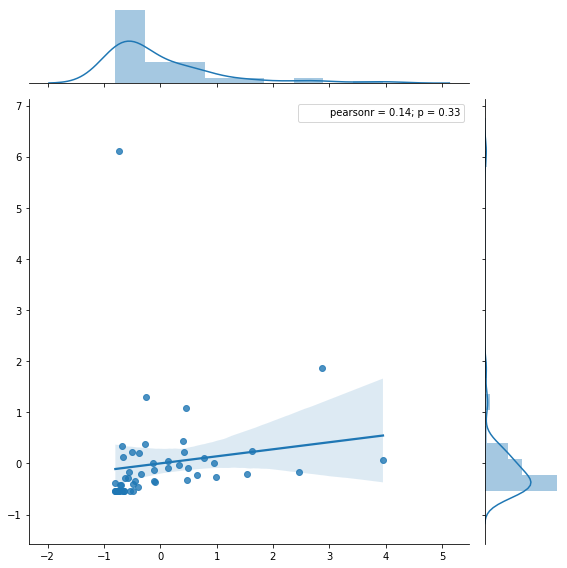

In [27]:
df = racism_index
x_var = 'state_abbr'
y_var = racism_index.columns.values[-1]
values = df[y_var].values

plot(df, x_var, y_var, values)

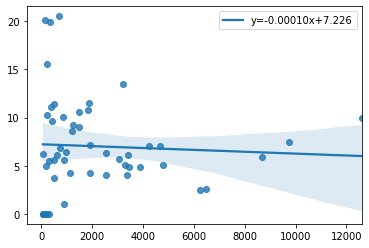

Normalization:


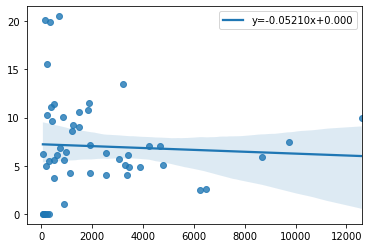

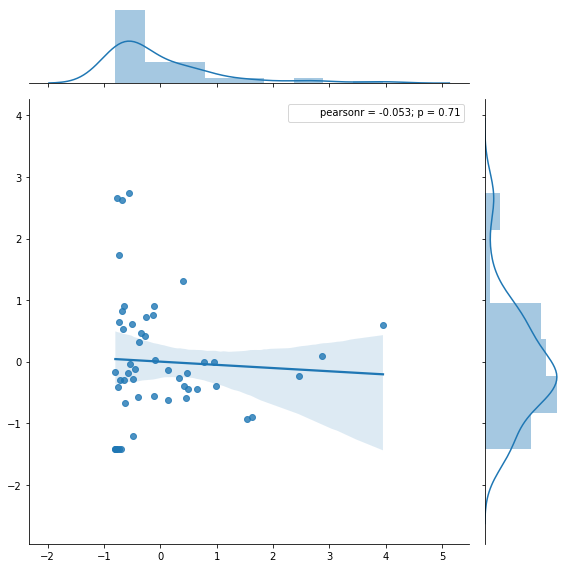

In [61]:
df = racism_index
x_var = 'state_abbr'
y_var = 'Black shootings rate (per 1,000,000 person-years)'
values = df[y_var].values

plot(df, x_var, y_var, values)

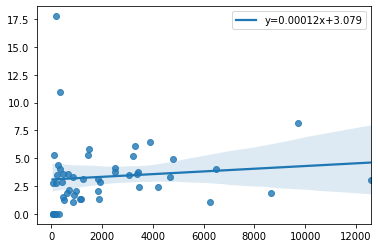

Normalization:


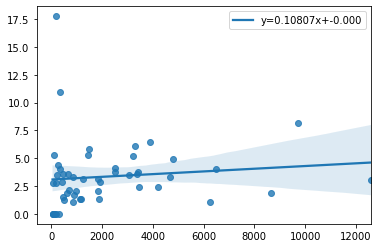

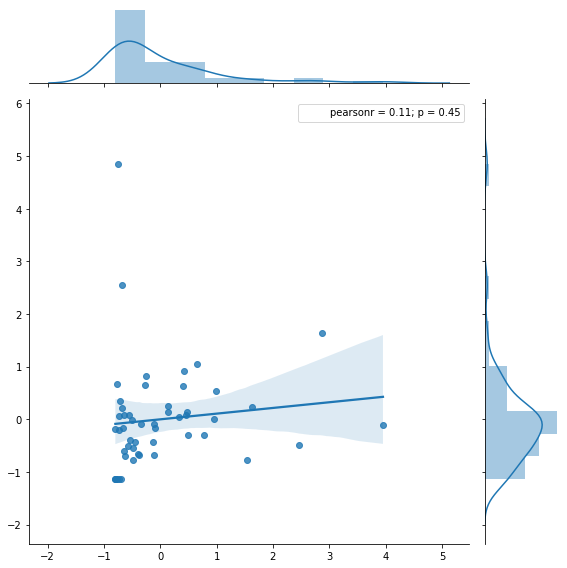

In [62]:
df = racism_index
x_var = 'state_abbr'
y_var = 'Black to White rate ratio'
values = df[y_var].values

plot(df, x_var, y_var, values)

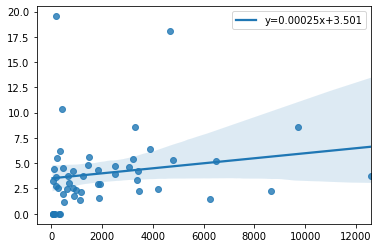

Normalization:


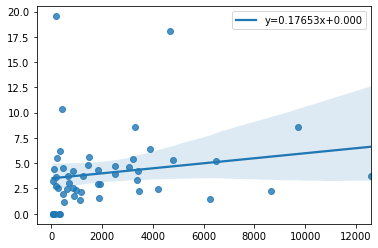

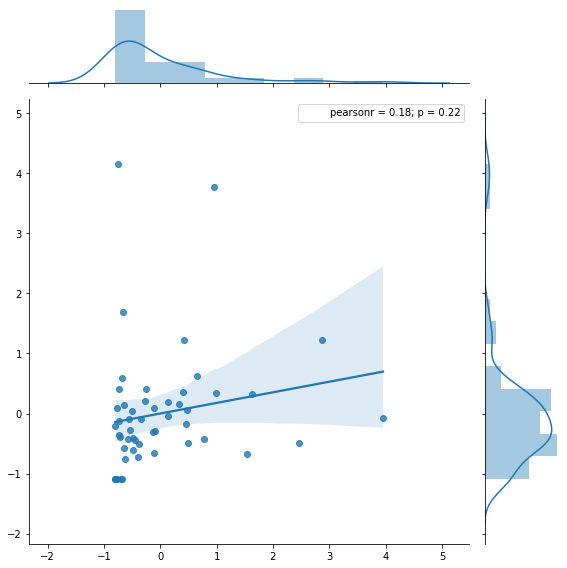

In [60]:
x_var = 'State Abbreviation'
y_var = 'Black-White Disparity'
df = state_shootings
values = df[y_var].values

plot(df, x_var, y_var, values)

In [66]:
sundown = pd.read_csv('../data/sundown_states.csv')

In [72]:
sundown_states = pd.DataFrame(sundown[sundown.status == 'Surely'].groupby(by = 'state').apply(len)).reset_index()

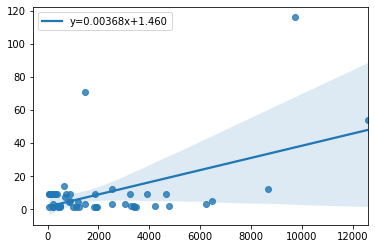

Normalization:


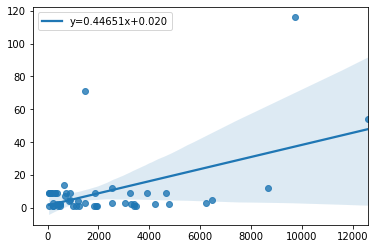

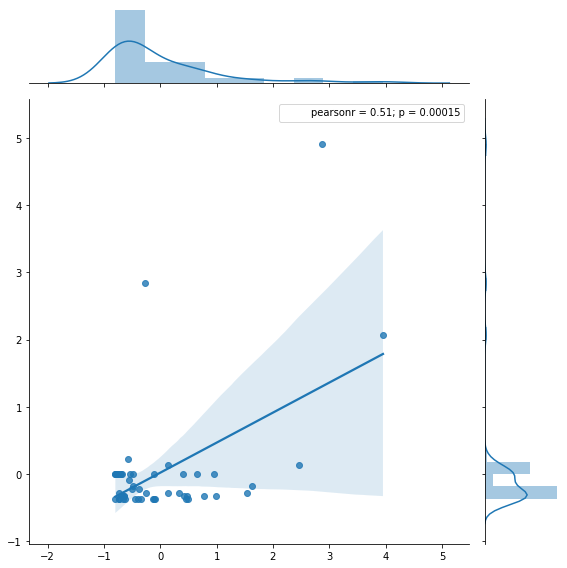

In [73]:
x_var = 'state'
y_var = 0
df = sundown_states
values = df[y_var].values

plot(df, x_var, y_var, values)

In [37]:
df = pd.read_csv('../data/geotweets/geotweets-blm-' + str(2016) + '.csv')
df = df[df.fips != -2]
df = df[df.notnull()]
df = df[df.fips.notnull()]

In [38]:
regions = [fips2region[i] if i in list(fips2region.keys()) else 'UNK' for i in df.fips.values]
df['regions'] = regions

In [40]:
df = df[df.regions == 'South']

In [48]:
df.sample(n = 500).t.to_csv('sample_south.csv')

In [39]:
counties_counts = {}

for year in tqdm(range(2013, 2020)):
    df = pd.read_csv('../data/geotweets/geotweets-blm-' + str(year) + '.csv')
    df = df[df.fips != -2]
    df = df[df.notnull()]
    df = df[df.fips.notnull()]
    
    num = dict(df.fips.value_counts())
    
    for i, j in num.items():
        if i in counties_counts:
            counties_counts[i] += j
        else:
            counties_counts[i] = j

100%|██████████| 7/7 [00:01<00:00,  6.11it/s]


In [40]:
df_mortality = pd.read_csv('../data/black_infant_mortality.csv')

In [41]:
df_mortality['Infant Mortality Rate'] = df_mortality['Deaths']/df_mortality['Population']

In [42]:
df_mortality[['County Code', 'Infant Mortality Rate']].values

array([[1.00100000e+03, 1.46721687e-02],
       [1.00300000e+03, 1.43421326e-02],
       [1.00500000e+03, 1.18475825e-02],
       ...,
       [5.51050000e+04, 1.29760226e-02],
       [5.51330000e+04, 7.35710243e-03],
       [5.51390000e+04, 1.31578947e-02]])

In [43]:
df_mortality['# of Tweets'] = [counties_counts[int(i)] if int(i) in counties_counts else 0 for i in df_mortality['County Code'].values]

In [44]:
counties_counts[17031]

8303

In [45]:
df_mortality = df_mortality[df_mortality['# of Tweets'] != 0]

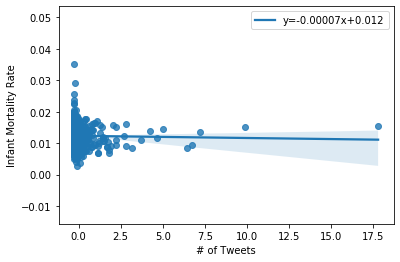

/home/kh278/jupyter-env/lib/python3.7/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


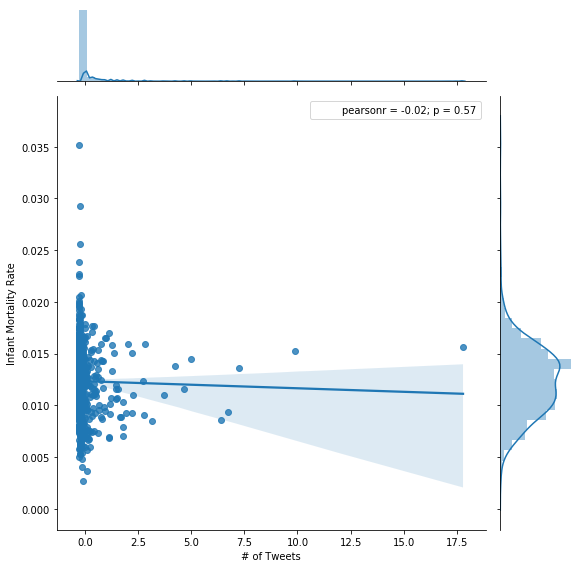

In [46]:
from scipy import stats

n_tweets_normalized = (df_mortality['# of Tweets'] - np.mean(df_mortality['# of Tweets']))/np.std(df_mortality['# of Tweets'])
index_norm = df_mortality['Infant Mortality Rate']

slope, intercept, r_value, p_value, std_err = stats.linregress(n_tweets_normalized, index_norm)

ax = sns.regplot(n_tweets_normalized, index_norm,
 line_kws={'label':"y={0:.5f}x+{1:.3f}".format(slope,intercept)})

ax.legend()
plt.show()

sns.jointplot(n_tweets_normalized, index_norm, kind='reg', height=8).annotate(stats.pearsonr)
